# Iris Species

#### Description: 

The Iris Species dataset is a classic dataset used in machine learning. It is often employed for classification tasks. The dataset's primary goal is to classify iris plants into one of three species based on various features.

#### Features:

The dataset includes four features, which are measurements in centimeters:

1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width

#### Task:

The main task associated with this dataset is to build a classification model that can accurately determine the species of iris plants based on the provided feature measurements.




In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
sns.reset_defaults()

In [3]:
# Read in the dataframe
data = sns.load_dataset("iris")
species_dict = {
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2,
}
data['species'] = data["species"].apply(lambda x: species_dict[x])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 1. Statistical numbers

In [4]:
# Numeric
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
columns = data.columns.difference(["species"])
data_plots = data[columns]
data_plots

,petal_length,petal_width,sepal_length,sepal_width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


# 2. Plots

## 2.1 Boxplot

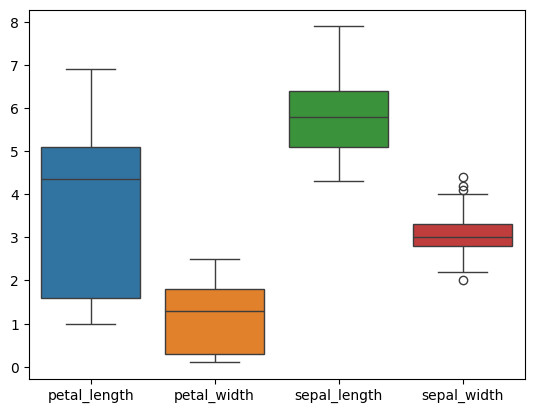

In [186]:

sns.boxplot(data=data_plots)
plt.show()

## 2.2 Violin Plot

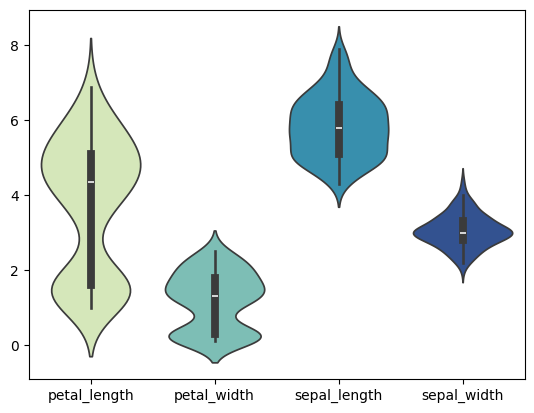

In [187]:
sns.violinplot(data=data_plots, palette="YlGnBu")
plt.show()

## 2.3 Histogram 

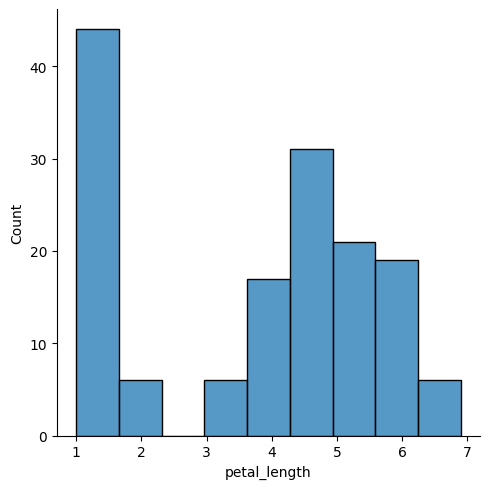

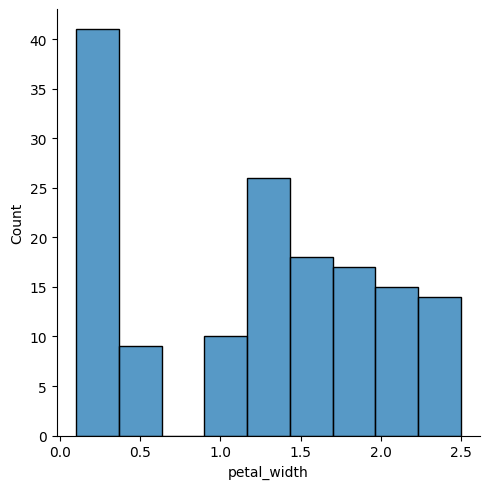

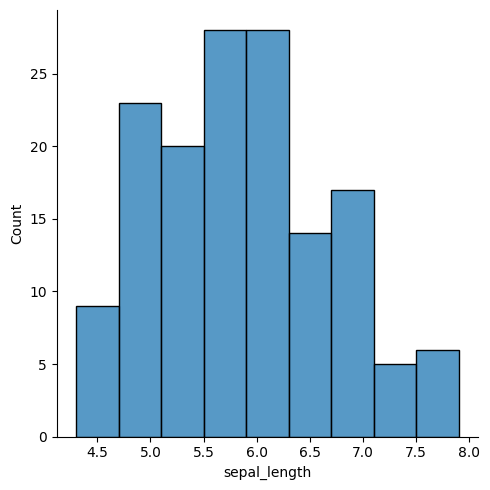

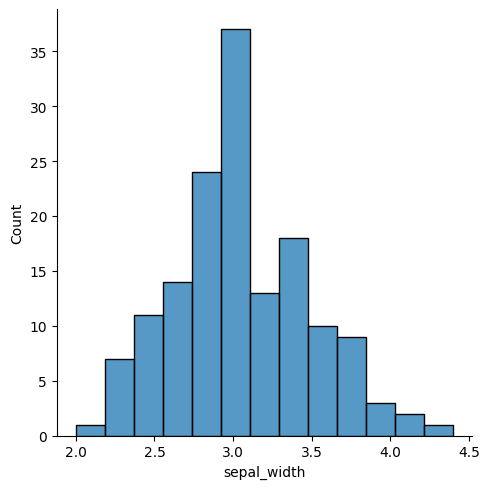

In [188]:
for col in data_plots.columns:
    sns.displot(
        data=data,
        x=col,
    )
plt.show()

## 2.4 Joined Plot

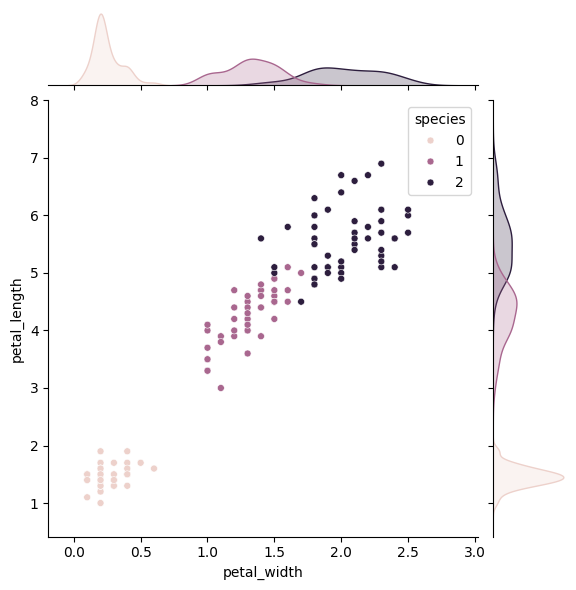

In [189]:
sns.jointplot(
    data=data,
    x="petal_width",
    y="petal_length",
    hue="species",
    s=25,
)
plt.show()

## 2.5 Scatter matrix

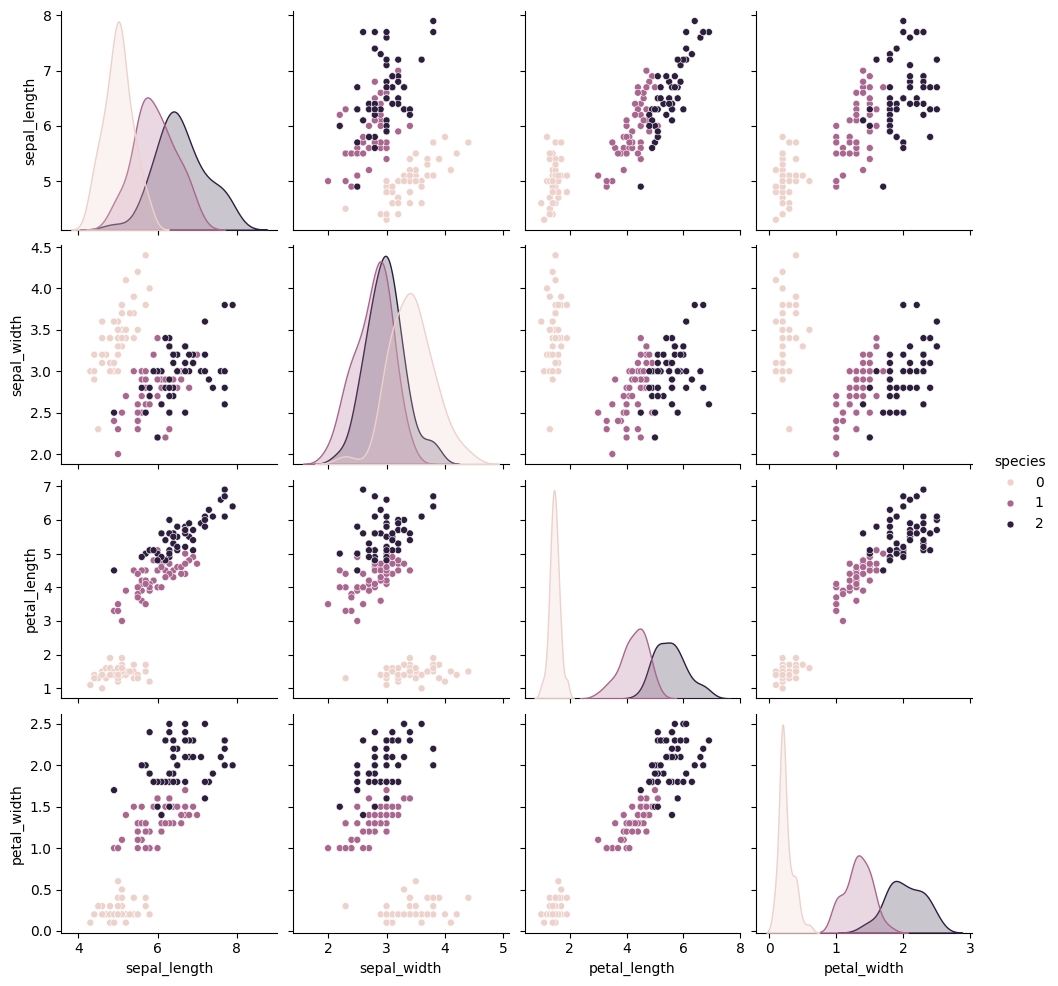

In [190]:
sns.pairplot(
    data=data,
    hue="species",
    plot_kws={'s': 25}
)
plt.show()

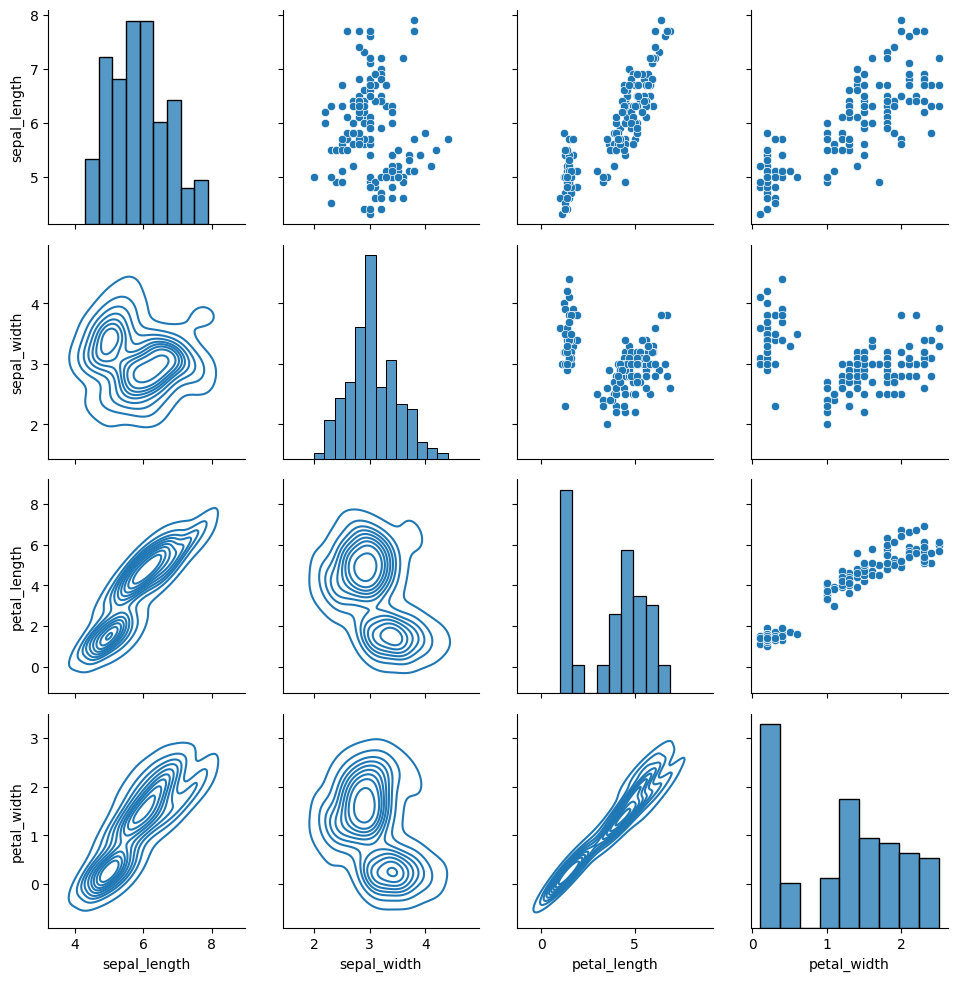

In [24]:
g = sns.PairGrid(
    data, 
    vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], 
    diag_sharey=False, 
    hue="species",
)

# Map scatterplot to each subplot
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

plt.show()

## 2.6 Correlations

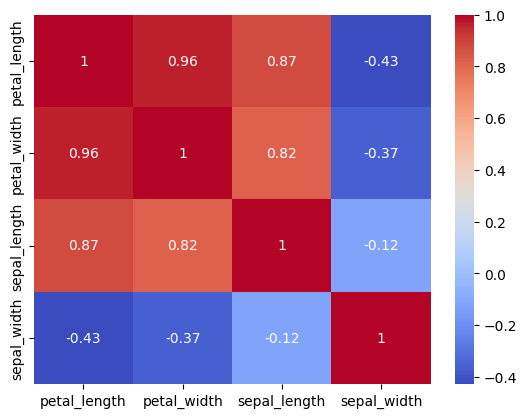

In [191]:
corr_matrix = data_plots.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

----

# 3. Machine Learning Classification


## 3.0 Standard start

In [232]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

In [218]:
# shuffle the data
data = data.sample(frac=1)

In [219]:
# split data
TEST_SIZE = 0.3
train_data, test_data = train_test_split(data, test_size=TEST_SIZE)

In [220]:
# split into x and Y
train_x = train_data.drop("species", axis=1)
train_y = train_data["species"]

test_x = test_data.drop("species", axis=1)
test_y = test_data["species"]

### 3.0.1 Basic structure (<span style="color:red">Code below doesnt work!!!</span>)

In [197]:
# initalizing
model = Model()

NameError: name 'Model' is not defined

In [196]:
# crossvalidation
scores = cross_val_score(model, train_x, train_y, cv=5)  # cv is the amount of chunks the data gets splitted
scores.mean()

NameError: name 'Model' is not defined

In [ ]:
# training and testing
model.fit(train_x, train_y)
model.score(test_x, test_y)

In [ ]:
cagetories = "category1"  # list of categories that are in the target 
y_pred = model.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, index=cagetories, columns=cagetories)
sns.heatmap(cm_df, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# getting the importances 
importances = pd.DataFrame({'Feature': model.feature_names_in_, 'Importance': model.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
importances

## 3.1 RandomForestClassifier

In [199]:
from sklearn.ensemble import RandomForestClassifier


In [221]:
forest = RandomForestClassifier()

In [222]:
scores = cross_val_score(forest, train_x, train_y, cv=10)
scores.mean()

0.9354545454545455

In [223]:
forest.fit(train_x, train_y)
forest.score(test_x, test_y)

0.9555555555555556

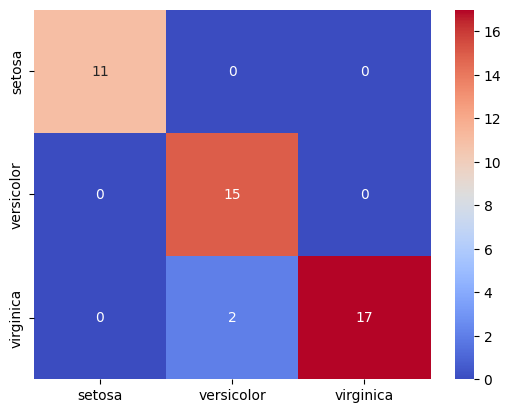

In [230]:
y_pred = forest.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])
sns.heatmap(cm_df, annot=True, cmap='coolwarm')
plt.show()

In [231]:
importances = pd.DataFrame({'Feature': forest.feature_names_in_, 'Importance': forest.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
importances

,Feature,Importance
0,petal_width,0.465157
1,petal_length,0.413833
2,sepal_length,0.095160
3,sepal_width,0.025850


## 3.2 GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [4, 8, 16, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=10
)

In [ ]:
scores = cross_val_score(grid_search, train_x, train_y, cv=5)
scores.mean()

In [233]:
grid_search.fit(train_x, train_y)
best_forest = grid_search.best_estimator_
print(f"Best forest: {best_forest}")
best_forest.score(test_x, test_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.0s
[CV 2/5; 1/48] START max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.0s
[CV 3/5; 1/48] START max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.905 total time=   0.0s
[CV 4/5; 1/48] START max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.952 total time=   0.0s
[CV 5/5; 1/48] START max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

0.9555555555555556

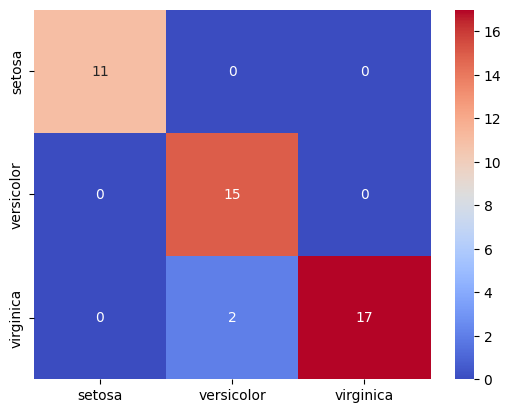

In [234]:
y_pred = best_forest.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])
sns.heatmap(cm_df, annot=True, cmap='coolwarm')
plt.show()

In [235]:
importances = pd.DataFrame({'Feature': best_forest.feature_names_in_, 'Importance': best_forest.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
importances

,Feature,Importance
0,petal_width,0.459352
1,petal_length,0.410268
2,sepal_length,0.112896
3,sepal_width,0.017484


### 3.3 AdaBoostClassifier

In [238]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

In [239]:
scores = cross_val_score(clf, train_x, train_y, cv=5)
scores.mean()

0.9142857142857143

In [240]:
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.9777777777777777

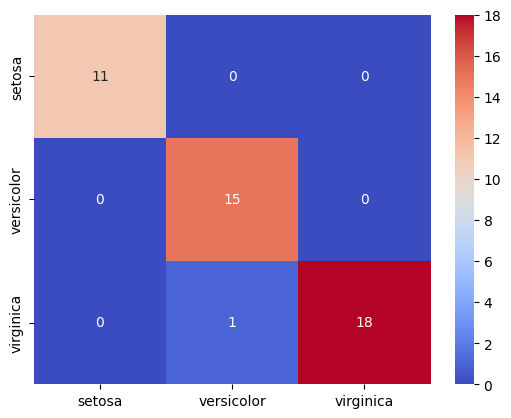

In [241]:
y_pred = clf.predict(test_x)
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])
sns.heatmap(cm_df, annot=True, cmap='coolwarm')
plt.show()

In [242]:
importances = pd.DataFrame({'Feature': clf.feature_names_in_, 'Importance': clf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
importances

,Feature,Importance
0,petal_length,0.51
1,petal_width,0.49
2,sepal_length,0.00
3,sepal_width,0.00
